<a href="https://colab.research.google.com/github/Ajith013/AI/blob/master/MNIST_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
%matplotlib inline

In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
assert(X_train.shape[0]== y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0]== y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:]== (28,28)), "The dimension of the image is not 28*28."
assert(X_test.shape[1:]== (28,28)), "The dimension of the image is not 28*28."


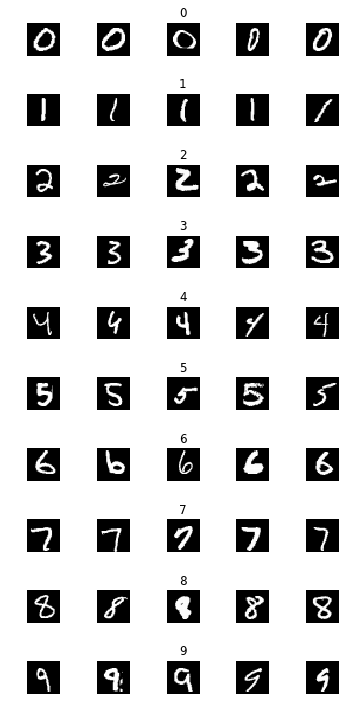

In [0]:
num_of_samples = []
cols = 5
num_classes = 10

fig , axs = plt.subplots(nrows = num_classes, ncols = cols, figsize=(5,10))
fig.tight_layout()


for i in range (cols):
    for j in range (num_classes):
        x_selected = X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :,:], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

In [0]:
print(num_of_samples)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0,0.5,'Number of images')

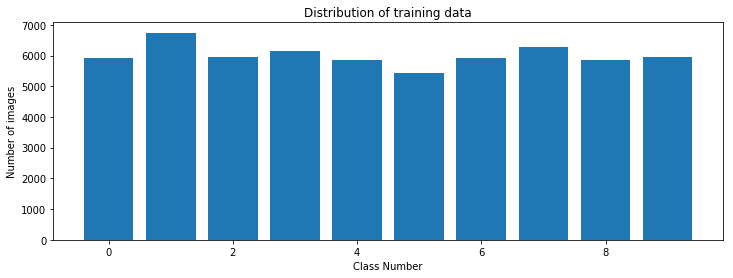

In [0]:
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of training data")
plt.xlabel("Class Number")
plt.ylabel("Number of images")

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels )
X_test = X_test.reshape(X_test.shape[0], num_pixels )

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [0]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(23, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.02), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
model = create_model()
history = model.fit(X_train, y_train, validation_split= 0.1, epochs = 10, batch_size = 200, verbose=1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 6s 107us/step - loss: 0.5300 - acc: 0.8419 - val_loss: 0.2921 - val_acc: 0.9137
Epoch 2/10
54000/54000 [==============================] - 3s 58us/step - loss: 0.3116 - acc: 0.9109 - val_loss: 0.2247 - val_acc: 0.9343
Epoch 3/10
54000/54000 [==============================] - 3s 55us/step - loss: 0.2797 - acc: 0.9191 - val_loss: 0.2484 - val_acc: 0.9258
Epoch 4/10
54000/54000 [==============================] - 3s 61us/step - loss: 0.2634 - acc: 0.9236 - val_loss: 0.2231 - val_acc: 0.9323
Epoch 5/10
54000/54000 [==============================] - 3s 61us/step - loss: 0.2544 - acc: 0.9257 - val_loss: 0.2156 - val_acc: 0.9343
Epoch 6/10
54000/54000 [==============================] - 3s 62us/step - loss: 0.2438 - acc: 0.9298 - val_loss: 0.1968 - val_acc: 0.9393
Epoch 7/10
54000/54000 [==============================] - 3s 60us/step - loss: 0.2425 - acc: 0.9313 - val_loss: 0.2148 - val_acc

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_23 (Dense)             (None, 23)                253       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                240       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
Total params: 8,453
Trainable params: 8,453
Non-trainable params: 0
_________________________________________________________________
None


Text(0.5,1,'Validation loss')

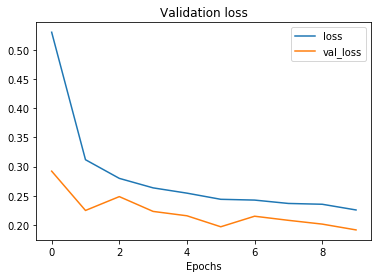

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')
plt.title('Validation loss')

Text(0.5,1,'Validation loss')

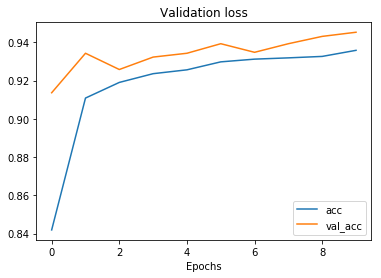

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.xlabel('Epochs')
plt.title('Validation loss')

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Score is :', score[0])
print('Accuracy is :', score[1])


Score is : 0.229496119943
Accuracy is : 0.9373


<Response [200]>


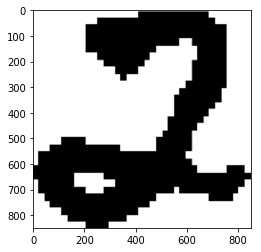

In [0]:
import requests 
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response  = requests.get(url, stream = True)
img = Image.open(response.raw)
print (response)
plt.imshow(img)

(28, 28)


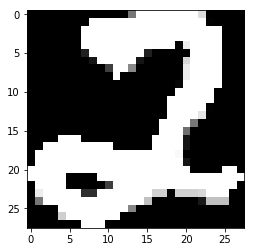

In [0]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
print(gray_scale.shape)
plt.imshow(image , cmap = plt.get_cmap("gray"))

In [0]:
image = image/255
image = image.reshape(1, 784)


In [0]:
prediction = model.predict_classes(image)
print('Prediction is:', str(prediction))

Prediction is: [6]
